In [8]:
using POMDPs
using GridInterpolations 
using POMDPModelTools
using POMDPPolicies
using Parameters
using StaticArrays
using DiscreteValueIteration 
using Distributed
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using PedestrianAvoidancePOMDP

using FileIO
using JLD2

using Interact
using Plots
using PGFPlots

In [10]:
# 1) choose betwenn only longitudinal
lateral_actions = [0.0]
# or lateral and longitudinal support
#lateral_actions = [1.0, 0.0, -1.0]


# 2) choose good values for the policy
# good values are the longitudinal support are following
# COLLISION_COST = -600.0
# ACTION_LON_COST = 0.0
# ACTION_LAT_COST = 0.0
# KEEP_VELOCITY_REWARD = 30.0
# KEEP_LANE_REWARD = 0.0
# PROBABILITY_PEDESTRIAN_BIRTH = 0.4


pomdp = SingleOCFPOMDP(lateral_actions=lateral_actions)
pomdp.COLLISION_COST = -600.0
pomdp.ACTION_LON_COST = 0.0
pomdp.ACTION_LAT_COST = 0.0
pomdp.KEEP_VELOCITY_REWARD = 20.0
pomdp.KEEP_LANE_REWARD = 0.0
pomdp.PROBABILITY_PEDESTRIAN_BIRTH = 0.05
pomdp.γ = 0.95

# train policy
solver = SparseValueIterationSolver(max_iterations=200, belres=1e-4, include_Q=true, verbose=true)
mdp = UnderlyingMDP(pomdp);
vi_policy = solve(solver, mdp)
qmdp_policy = AlphaVectorPolicy(pomdp, vi_policy.qmat, vi_policy.action_map)

# save policy!
FileIO.save("policy.jld2", "policy", qmdp_policy)


┌ Info: residual: 864.065851946032, time: 0.6564831, total time: 0.6564831 
│   i = 1
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 777.3110946949732, time: 0.8815554, total time: 1.5380384999999999 
│   i = 2
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 725.5672900968818, time: 0.169747699, total time: 1.7077861989999998 
│   i = 3
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 671.5102565229716, time: 0.1837083, total time: 1.8914944989999998 
│   i = 4
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 590.5842489072467, time: 0.14228, total time: 2.0337744989999997 
│   i = 5
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Inf

┌ Info: residual: 2.4417309747370837, time: 0.124787899, total time: 8.826451599999999 
│   i = 42
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 2.3196444260002522, time: 0.1323623, total time: 8.958813899999999 
│   i = 43
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 2.2036622047002083, time: 0.2250949, total time: 9.1839088 
│   i = 44
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 2.093479094465181, time: 0.1384992, total time: 9.322408 
│   i = 45
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 1.9888051397419986, time: 0.1345547, total time: 9.4569627 
│   i = 46
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residu

┌ Info: residual: 0.2831973822671898, time: 0.101423299, total time: 14.639648096999997 
│   i = 84
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.2690375131538758, time: 0.1002724, total time: 14.739920496999996 
│   i = 85
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.2555856374961536, time: 0.1762209, total time: 14.916141396999997 
│   i = 86
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.24280635562138286, time: 0.1258343, total time: 15.041975696999996 
│   i = 87
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.23066603784030804, time: 0.101744401, total time: 15.143720097999996 
│   i = 88
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\Eo

┌ Info: residual: 0.034574591012471956, time: 0.100959, total time: 20.896867801000006 
│   i = 125
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.032845861461908044, time: 0.1038833, total time: 21.000751101000006 
│   i = 126
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.031203568388775693, time: 0.101583301, total time: 21.102334402000007 
│   i = 127
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.02964338996935112, time: 0.150913199, total time: 21.25324760100001 
│   i = 128
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.0281612204709063, time: 0.092486101, total time: 21.345733702000008 
│   i = 129
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIt

┌ Info: residual: 0.004443255253534062, time: 0.1625944, total time: 25.214201901000006 
│   i = 165
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.004221092490865885, time: 0.114374, total time: 25.328575901000008 
│   i = 166
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.004010037866351013, time: 0.1507998, total time: 25.47937570100001 
│   i = 167
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.003809535973061884, time: 0.2811391, total time: 25.76051480100001 
│   i = 168
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueIteration\EoTHI\src\sparse.jl:75
┌ Info: residual: 0.003619059174411632, time: 0.131438501, total time: 25.89195330200001 
│   i = 169
└ @ DiscreteValueIteration C:\Users\Maxime\.julia\packages\DiscreteValueItera

In [11]:
# Visulization policy / longitudinal action

gr()
policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
   # ego_v = 8.0
    @manipulate for ped_v in pomdp.PED_V_RANGE
   # ped_v = 0.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                act = action(qmdp_policy, b) 
                policy_grid[i,j] = act.acc
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ego_v"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 29,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Maxime\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Maxime\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Maxime\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001416f3d0, Task (runnable) @0x000000001416f3d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.5\",\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\",\"5.5\",\"6.0\",\"6.5\",\"7.0\",\"7.5\",\"8.0\",\"8.5\",\"9.0\",\"9.5\",\"10.0\",\"10.5\",\"1

In [12]:
# Visulization policy / lateral action

gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                act = action(qmdp_policy, b) 
                policy_grid[i,j] = act.lateral_movement
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ego_v"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 29,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
15, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Maxime\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Maxime\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Maxime\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000005189b990, Task (runnable) @0x000000005189b990), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.5\",\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\",\"5.5\",\"6.0\",\"6.5\",\"7.0\",\"7.5\",\"8.0\",\"8.5\",\"9.0\",\"9.5\",\"10.0\",\"10.5\",\"1

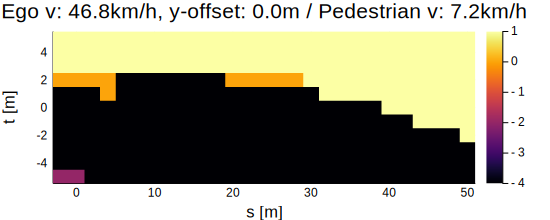

In [8]:
# generate plots of the policy

gr(size=(550,220))
p = heatmap()
for ego_v in [ 4.0, 7.5, 13.0]
    p = heatmap()
    policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))
    ped_v = 2.0
    ego_y = 0.0
    title = string("Ego v: ", round(ego_v*3.6,digits=1), "km/h, y-offset: ", ego_y, "m  /  Pedestrian v: ", ped_v*3.6, "km/h")
    for i=1:length(pomdp.T_RANGE)
                ped_t = pomdp.T_RANGE[i]
                for j=1:length(pomdp.S_RANGE)
                    ped_s = pomdp.S_RANGE[j]
                    b = SparseCat([SingleOCFState(ego_y, ego_v, ped_s, ped_t, pomdp.PED_THETA_RANGE[1], ped_v)],[1.])
                    act = action(qmdp_policy, b) 
                    policy_grid[i,j] = act.acc
                end
    end
    xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
    ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
    p = heatmap(xs,ys,policy_grid, xlabel="s [m]", ylabel="t [m]", title=title)
    savefig(string("policy_ego_v_", ego_v, "_ego_y_", ego_y, "_ped_v_", ped_v,  ".pdf"))
end
p

In [ ]:
b = SingleOCFBelief([SingleOCFState(0.0, 5.0, 50.0, 3.0, 1.57, 0.0)], [1.0])
act = action(qmdp_policy, b) # policy
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy,b)
vi_policy.util[18223]


#######################

b = SparseCat([SingleOCFState(0.0, 18.0, -10.0, -10.0, pomdp.PED_THETA_RANGE[1], 0.0)],[1.])
act = action(qmdp_policy, b) 
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy, b)


#######################

# Test action space
cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = actionindex(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
    println(a)
end
println(cnt)


#######################

s = SingleOCFState(0.0, 14, 50.0, -3.0, 1.57, 0.0)
sp = SingleOCFState(0.0, 14., 50.0, 0.0, 1.57, 0.0)
act = SingleOCFAction(0.0, 0.0)
print("reward: ", reward(pomdp, s, act, sp))

b = SparseCat([sp],[1.])
act = action(qmdp_policy, b) 
